In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import math


In [2]:
df=pd.read_csv('letters.csv')


In [3]:
df.shape

(42000, 46)

In [4]:
df

,label,pixel43,pixel44,pixel92,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,...,pixel329,pixel351,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417
0,1,0,0,0,0,0,0,0,0,0,...,0,254,0,0,0,0,0,0,0,0
1,0,0,0,0,137,137,192,86,72,1,...,254,0,0,75,254,254,254,17,0,0
2,1,0,0,0,3,141,139,3,0,0,...,0,184,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,94,255,69,0,0,0,0,0
4,0,0,0,0,155,254,254,254,157,30,...,253,0,0,0,223,253,253,253,129,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,2,0,0,1,248,253,176,43,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,128,...,0,0,0,0,255,255,0,0,0,0
41997,2,0,0,0,255,255,191,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,2,0,0,0,255,128,0,0,0,0,...,0,255,0,0,0,0,0,0,0,0


In [5]:
X=df.iloc[:, 1:]
y=df.iloc[:, 0]

In [6]:
y.unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [9]:
X_train.iloc[0].shape

(45,)

In [10]:
X_train=X_train/255
X_test=X_test/255

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [12]:
model=Sequential([ Dense(44, input_shape=(45,),activation='relu'),
    Dense(22, input_shape=(45,),activation='relu'),
    Dense(10, activation='sigmoid')])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train, epochs=10)

Epoch 1/10
985/985 [==============================] - 10s 4ms/step - loss: 1.4312 - accuracy: 0.5039
Epoch 2/10
985/985 [==============================] - 3s 3ms/step - loss: 1.0888 - accuracy: 0.6255
Epoch 3/10
985/985 [==============================] - 4s 4ms/step - loss: 1.0192 - accuracy: 0.6434
Epoch 4/10
985/985 [==============================] - 4s 4ms/step - loss: 0.9832 - accuracy: 0.6525
Epoch 5/10
985/985 [==============================] - 4s 4ms/step - loss: 0.9610 - accuracy: 0.6591
Epoch 6/10
985/985 [==============================] - 4s 4ms/step - loss: 0.9426 - accuracy: 0.6648
Epoch 7/10
985/985 [==============================] - 4s 4ms/step - loss: 0.9304 - accuracy: 0.6683
Epoch 8/10
985/985 [==============================] - 3s 4ms/step - loss: 0.9193 - accuracy: 0.6723
Epoch 9/10
985/985 [==============================] - 3s 3ms/step - loss: 0.9089 - accuracy: 0.6754
Epoch 10/10
985/985 [==============================] - 3s 3ms/step - loss: 0.9020 - accuracy: 0.678

In [13]:
model.evaluate(X_test,y_test)

329/329 [==============================] - 1s 1ms/step - loss: 0.9342 - accuracy: 0.6642


[0.9341827630996704, 0.6641904711723328]

In [14]:
predictions=model.predict(X_test)

In [15]:
predictions_label=[np.argmax(i) for i in predictions]

In [16]:
confusion_matrix=tf.math.confusion_matrix(labels=y_test,predictions=predictions_label)

Text(87.0, 0.5, 'Truth')

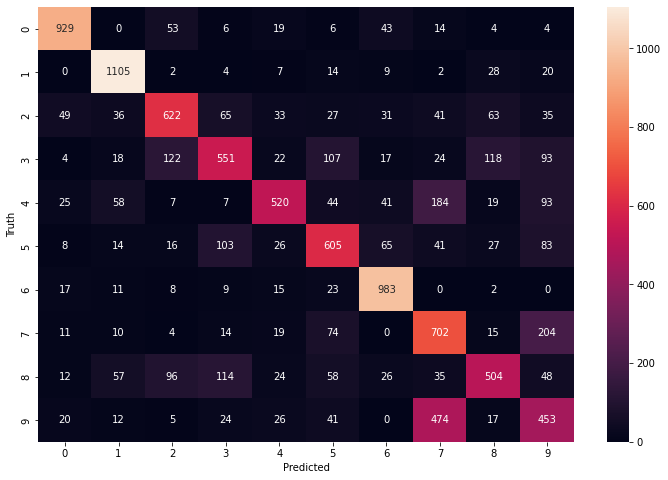

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [20]:
print(classification_report(y_test,predictions_label))

NameError: ignored

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

'KNN Accuracy:'
f'{round(accuracy_score(y_test, y_pred_knn) * 100, 2)} %'

'64.66 %'

In [23]:
error_rate = []

for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

In [24]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))



[[ 964    0   36    2   18    4   28   11    8    7]
 [   0 1134    7    3    7    8    4   13    9    6]
 [  71   38  618   85   25   13   19   56   59   18]
 [  19   28  132  581   30   75    9   41  117   44]
 [  25   80   11   17  569   29   22  157   13   75]
 [  12   41   35  154   38  522   55   62   31   38]
 [  37   26   14   18   14   18  932    1    8    0]
 [  12   12   15   35   90   51    0  627   15  196]
 [  20   80  113  133   20   59   26   38  453   32]
 [  30   22   10   41   72   40    0  446   22  389]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1078
           1       0.78      0.95      0.86      1191
           2       0.62      0.62      0.62      1002
           3       0.54      0.54      0.54      1076
           4       0.64      0.57      0.60       998
           5       0.64      0.53      0.58       988
           6       0.85      0.87      0.86      1068
           7       0.43      0.60   

Text(0, 0.5, 'Error Rate')

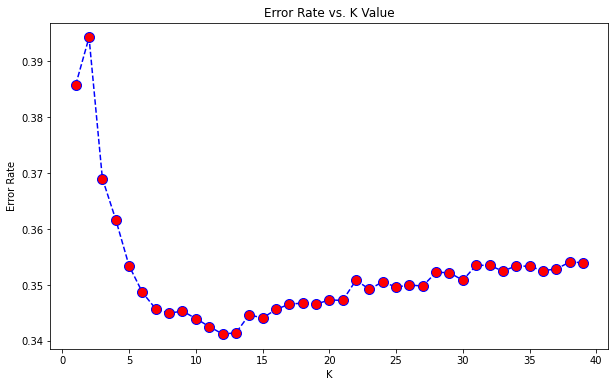

In [25]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

'KNN Accuracy:'
f'{round(accuracy_score(y_test, y_pred_knn) * 100, 2)} %'

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

